In [ ]:
pip install pingouin

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

In [ ]:
comments = pd.read_csv('youtoxic_english_1000.csv')
comments

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ugi5ADt10EdDz3gCoAEC,XRuCW80L9mA,I remember that they sent in the national defe...,False,False,False,False,False,False,False,False,False,False,False,False
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,Stats don`t represent the problem. Race baitin...,True,False,False,False,False,True,True,False,False,False,False,False
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,The quote from the mother... Wow that hit hard...,False,False,False,False,False,False,False,False,False,False,False,False
998,Ugj0bah1De8xy3gCoAEC,XRuCW80L9mA,this video is so racist,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
comments.info()
comments.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [ ]:
comments['words'] = comments['Text'].str.split(r'[@|#|,|.|/|"|\s+]')
comments['words']

0      [If, only, people, would, just, take, a, step,...
1      [Law, enforcement, is, not, trained, to, shoot...
2      [, Dont, you, reckon, them, 'black, lives, mat...
3      [There, are, a, very, large, number, of, peopl...
4      [The, Arab, dude, is, absolutely, right, , he,...
                             ...                        
995    [I, remember, that, they, sent, in, the, natio...
996    [Stats, don`t, represent, the, problem, , Race...
997    [The, quote, from, the, mother, , , , Wow, tha...
998                        [this, video, is, so, racist]
999    [God, , the, narrator, has, such, an, annoying...
Name: words, Length: 1000, dtype: object

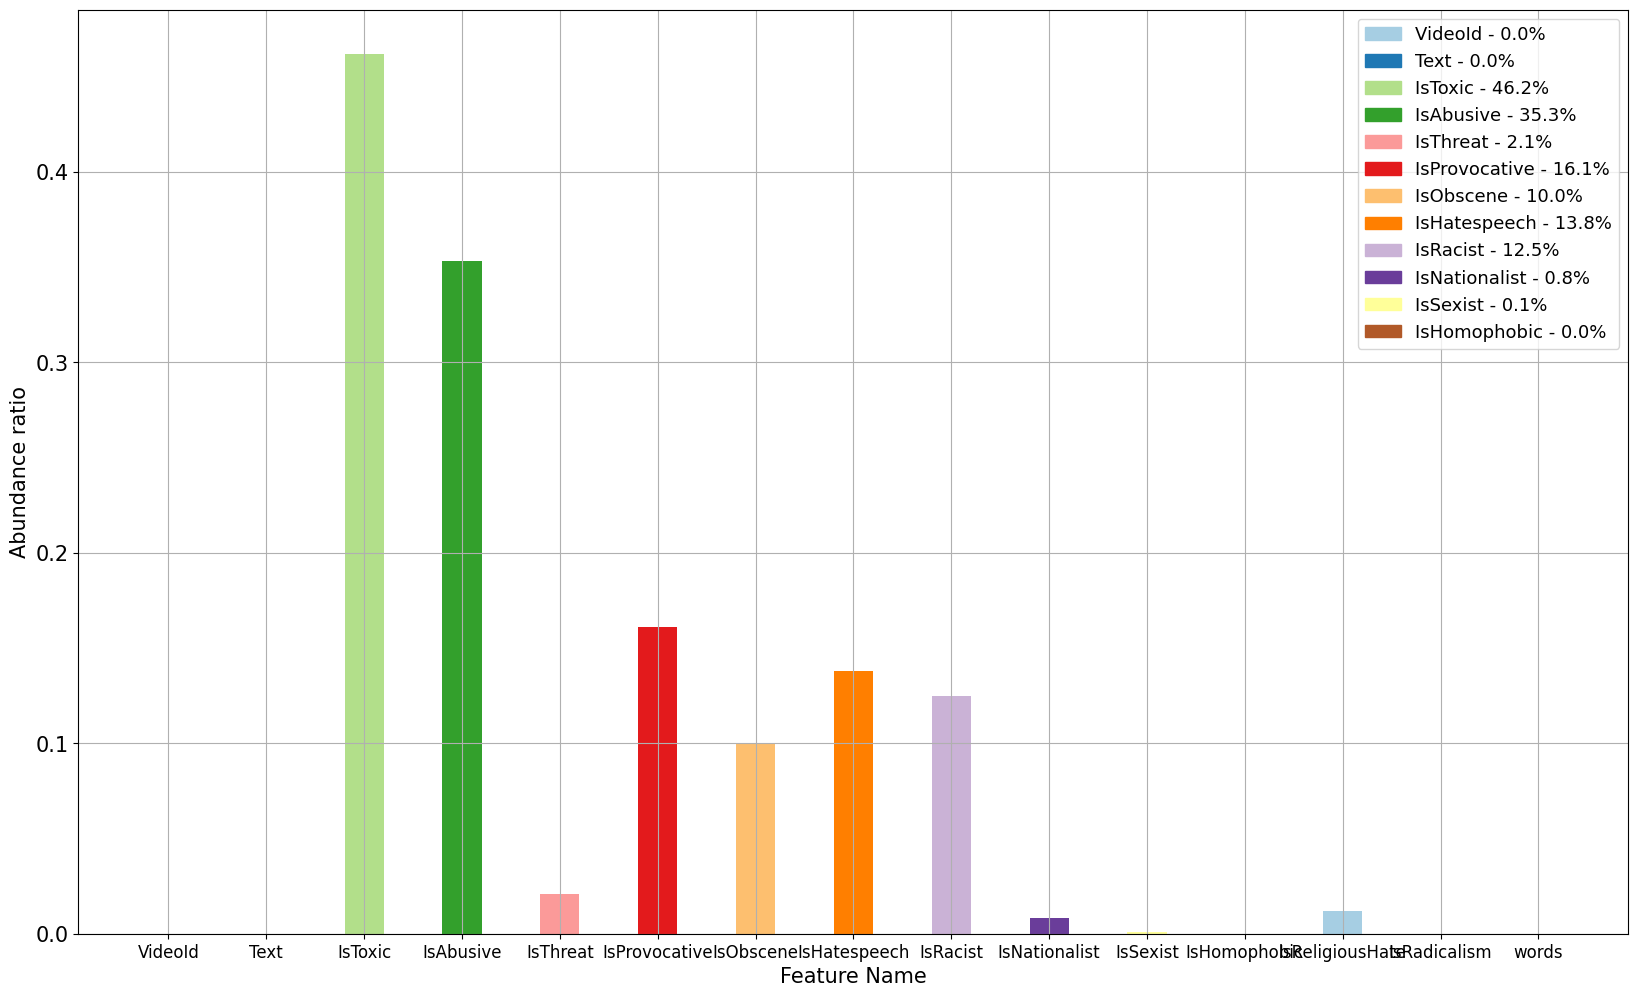

In [ ]:
timport matplotlib.patches as mpatches
import matplotlib.pyplot as plt

columns_names = comments.columns.tolist()
bar_data = {}
for name in columns_names[1:]:
    bar_data[name] = len(comments.loc[comments[name] == 1]) / len(comments[name])


bar_name = list(bar_data.keys())
values = list(bar_data.values())
fig = plt.figure(figsize = (20, 12))
colors = plt.cm.Paired(np.arange(12))

plt.bar(bar_name, values, color = colors,
        width = 0.4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("Feature Name", fontsize=15)
plt.ylabel("Abundance ratio", fontsize=15)
#plt.title("Percentage of each feature from all comments", fontsize=30)

patch = [mpatches.Patch(color=color, label=f"{bar_name} - {value*100}%")
         for color,value, bar_name in zip(colors, values, bar_name)]
plt.legend(handles=patch, fontsize=13)
plt.grid()
plt.show()

In [ ]:
racist_word_count = comments[comments['IsRacist'] == True]['words'].explode().value_counts()
racist_word_count = racist_word_count.reset_index().rename(columns = {'index':'words', 'words':'counts'})
racist_word_count = racist_word_count[racist_word_count['words'].str.len() >= 4]
racist_word_count.head(20)

,words,counts
8,black,62
9,people,60
11,this,53
13,that,49
14,they,49
17,like,46
19,white,40
22,with,35
29,their,26
33,from,22


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['counts'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['counts'], **{})
chart

In [ ]:
racist_word_count['words'] = racist_word_count['words'].str.lower()
racist_word_count.loc[racist_word_count['words'] == 'blacks', 'words'] = 'black'
racist_word_count = racist_word_count.groupby('words', as_index = False)['counts'].sum().sort_values('counts', ascending = False)
racist_word_count.head(10)

,words,counts
178,black,106
1359,this,76
986,people,64
1345,they,58
1332,that,52
1483,white,52
795,like,49
1497,with,37
1475,what,27
1514,would,27


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['counts'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['counts'], **{})
chart

In [ ]:
comments['Text'] = comments['Text'].str.lower()
comments['word_black'] = np.where(comments['Text'].str.contains('black'), True, False)
comments[['Text', 'IsRacist', 'word_black']]

,Text,IsRacist,word_black
0,if only people would just take a step back and...,False,False
1,law enforcement is not trained to shoot to app...,False,False
2,\ndont you reckon them 'black lives matter' ba...,False,True
3,there are a very large number of people who do...,False,False
4,"the arab dude is absolutely right, he should h...",False,False
...,...,...,...
995,i remember that they sent in the national defe...,False,False
996,stats don`t represent the problem. race baitin...,True,False
997,the quote from the mother... wow that hit hard...,False,False
998,this video is so racist,False,False


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_4, *['IsRacist'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_5, *['word_black'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_6, *['IsRacist', 'word_black'], **{})
chart

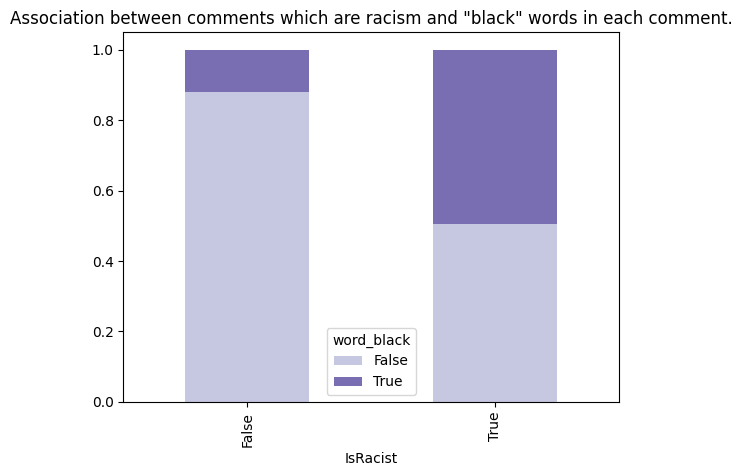

In [ ]:
black_racist = comments.groupby('IsRacist', as_index = True)['word_black'].value_counts(normalize = True)
black_racist = black_racist.unstack()
black_racist.plot(kind = 'bar', stacked = True, color = sns.color_palette('Purples', 2))
plt.title('Association between comments which are racism and "black" words in each comment.')
plt.show()

In [ ]:
black_racist_ct = pd.crosstab(comments['word_black'], comments['IsRacist'])
black_racist_ct = black_racist_ct.sort_index(axis = 0, ascending = False)
black_racist_ct = black_racist_ct.sort_index(axis = 1, ascending = False)
black_racist_ct

IsRacist,True,False
word_black,,
True,62,104
False,63,771


In [ ]:
expected, observed, chi_stats = pg.chi2_independence(data = comments, x = 'IsRacist', y = 'word_black')
chi_stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,109.663732,1.0,1.161069e-25,0.331155,1.0
1,cressie-read,0.666667,99.632820,1.0,1.834392e-23,0.315647,1.0
2,log-likelihood,0.000000,85.594908,1.0,2.208434e-20,0.292566,1.0
3,freeman-tukey,-0.500000,78.917574,1.0,6.475613e-19,0.280923,1.0
4,mod-log-likelihood,-1.000000,74.621855,1.0,5.700860e-18,0.273170,1.0
5,neyman,-2.000000,71.197332,1.0,3.232248e-17,0.266828,1.0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(chi_stats, *['lambda'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(chi_stats, *['chi2'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(chi_stats, *['pval'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(chi_stats, *['cramer'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(chi_stats, *['lambda'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(chi_stats, *['chi2'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(chi_stats, *['pval'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(chi_stats, *['cramer'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(chi_stats, *['test'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(chi_stats, *[[['lambda', 'chi2'], ['chi2', 'pval'], ['pval', 'cramer'], ['cramer', 'power']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(chi_stats, *['lambda', 'test'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(chi_stats, *['chi2', 'test'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(chi_stats, *['pval', 'test'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(chi_stats, *['cramer', 'test'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(chi_stats, *['dof', 'lambda', 'test'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(chi_stats, *['dof', 'chi2', 'test'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(chi_stats, *['dof', 'cramer', 'test'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(chi_stats, *['dof', 'power', 'test'], **{})
chart

In [ ]:
toxic = comments[['Text', 'IsToxic']]
toxic

,Text,IsToxic
0,If only people would just take a step back and...,False
1,Law enforcement is not trained to shoot to app...,True
2,\nDont you reckon them 'black lives matter' ba...,True
3,There are a very large number of people who do...,False
4,"The Arab dude is absolutely right, he should h...",False
...,...,...
995,I remember that they sent in the national defe...,False
996,Stats don`t represent the problem. Race baitin...,True
997,The quote from the mother... Wow that hit hard...,False
998,this video is so racist,False


In [ ]:
vec = TfidfVectorizer()
tfidf_matrix = vec.fit_transform(toxic['Text'])

print('Vocabulary :')
print(vec.get_feature_names_out())

print('TF-IDF Matrix Shape :')
print(tfidf_matrix.shape)

Vocabulary :
['00' '000' '03' ... 'zimmerman' 'zionist' 'zone']
TF-IDF Matrix Shape :
(1000, 4576)


In [ ]:
dense_tfidf_matrix = tfidf_matrix.toarray()
print('TF-IDF Matrix Array :')
print(dense_tfidf_matrix)

TF-IDF Matrix Array :
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
dense_tfidf_matrix = pd.DataFrame(dense_tfidf_matrix, columns = vec.get_feature_names_out())
dense_tfidf_matrix

,00,000,03,05,08,09,10,100,10th,11,...,youse,youth,youtu,youtube,ypu,yr,yup,zimmerman,zionist,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
toxic_vectorized = pd.concat([toxic, dense_tfidf_matrix], axis = 1)
toxic_vectorized

,Text,IsToxic,00,000,03,05,08,09,10,100,...,youse,youth,youtu,youtube,ypu,yr,yup,zimmerman,zionist,zone
0,If only people would just take a step back and...,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Law enforcement is not trained to shoot to app...,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,\nDont you reckon them 'black lives matter' ba...,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,There are a very large number of people who do...,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"The Arab dude is absolutely right, he should h...",False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,I remember that they sent in the national defe...,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,Stats don`t represent the problem. Race baitin...,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,The quote from the mother... Wow that hit hard...,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,this video is so racist,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = toxic_vectorized.drop(['Text', 'IsToxic'], axis = 1)
y = toxic_vectorized['IsToxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 123)

In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 123)

In [ ]:
knn = KNeighborsClassifier()
knn_param = {'n_neighbors':np.arange(1, 21)}
knn_cv = GridSearchCV(knn, param_grid = knn_param, cv = kf)
knn_cv.fit(X_train, y_train)

print("Tuned KNN paramaters: {}".format(knn_cv.best_params_))
print("Tuned KNN score: {}".format(knn_cv.best_score_))

Tuned KNN paramaters: {'n_neighbors': 19}
Tuned KNN score: 0.6228571428571429


In [ ]:
logreg = LogisticRegression(penalty = 'l2')
logreg_param = {'C':[0.001, 0.01, 0.1, 1, 10]}
logreg_cv = GridSearchCV(logreg, param_grid = logreg_param, cv = kf)
logreg_cv.fit(X_train, y_train)

print('Tuned Logistic Regression parameters: {}'.format(logreg_cv.best_params_))
print('Tuned Logistic Regression score : {}'.format(logreg_cv.best_score_))

Tuned Logistic Regression parameters: {'C': 10}
Tuned Logistic Regression score : 0.6528571428571428


In [ ]:
svc = SVC()
svc_param = {'kernel':['linear', 'rbf'], 'C':[0.1, 1.0, 10], 'gamma':np.linspace(0.00001, 10, num = 7)}
svc_cv = GridSearchCV(svc, param_grid = svc_param, cv = kf)
svc_cv.fit(X_train, y_train)

print('Tuned SVC parameters: {}'.format(svc_cv.best_params_))
print('Tuned SVC score: {}'.format(svc_cv.best_score_))

Tuned SVC parameters: {'C': 1.0, 'gamma': 1e-05, 'kernel': 'linear'}
Tuned SVC score: 0.6557142857142857


In [ ]:
tree = DecisionTreeClassifier()
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [None, 5, 10],
          'min_samples_split': np.arange(2, 11),
          'min_samples_leaf': np.arange(1, 11)}

tree_cv = GridSearchCV(tree, param_grid = params, cv = kf)
tree_cv.fit(X_train, y_train)

print('Tuned Decision Tree parameters : {}'.format(tree_cv.best_params_))
print('Tuned Decision Tree scores : {}'.format(tree_cv.best_score_))

Tuned Decision Tree parameters : {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 8}
Tuned Decision Tree scores : 0.6457142857142857


In [ ]:
forest = RandomForestClassifier()
params = {'n_estimators' : np.arange(10, 101, 10),
          'random_state': [123]}

forest_cv = GridSearchCV(forest, param_grid = params, cv = kf)
forest_cv.fit(X_train, y_train)

print('Tuned Random Forest parameters : {}'.format(forest_cv.best_params_))
print('Tuned Random Forest scores : {}'.format(forest_cv.best_score_))

Tuned Random Forest parameters : {'n_estimators': 20, 'random_state': 123}
Tuned Random Forest scores : 0.6385714285714287


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

np.random.seed(0)

new_data = comments["Text"]
target = comments["IsToxic"]

comments_train, comments_test, y_train, y_test = train_test_split(new_data, target,
                                                                  test_size=0.30, stratify=target, random_state = 42)

vectorizer = TfidfVectorizer(max_features=2500, min_df=8, max_df=0.8)
vectorizer.fit(comments_train)

x_train = vectorizer.transform(comments_train)
x_test = vectorizer.transform(comments_test)

In [ ]:
x_train_array = x_train.toarray()
x_test_array = x_test.toarray()

In [ ]:
# Initialize classifiers
from sklearn.naive_bayes import GaussianNB
classifiers = [
    RandomForestClassifier(n_estimators=200, random_state=42),
    SVC(C=1.0, kernel='rbf', gamma='scale'),
    LogisticRegression(solver='lbfgs', max_iter=1000),
    KNeighborsClassifier(n_neighbors=5),
    GaussianNB()
]


for classifier in classifiers:

    cross_arr = cross_val_score(classifier, x_train_array, y_train, cv = 4, scoring = "accuracy")
    print(f"{classifier.__class__.__name__} accuracies of cross: {cross_arr} -----> mean of accuracies : {sum(cross_arr)/len(cross_arr)}")

RandomForestClassifier accuracies of cross: [0.54857143 0.68       0.73142857 0.72571429] -----> mean of accuracies : 0.6714285714285715
SVC accuracies of cross: [0.62857143 0.65142857 0.72       0.68571429] -----> mean of accuracies : 0.6714285714285715
LogisticRegression accuracies of cross: [0.61142857 0.66285714 0.74285714 0.66285714] -----> mean of accuracies : 0.6699999999999999
KNeighborsClassifier accuracies of cross: [0.56571429 0.59428571 0.56571429 0.53142857] -----> mean of accuracies : 0.5642857142857144
GaussianNB accuracies of cross: [0.66857143 0.58285714 0.68571429 0.66285714] -----> mean of accuracies : 0.6499999999999999


In [ ]:
for classifier in classifiers:
    classifier.fit(x_train_array, y_train)
    y_pred = classifier.predict(x_test_array)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{classifier.__class__.__name__} accuracy: {accuracy}")

RandomForestClassifier accuracy: 0.7166666666666667
SVC accuracy: 0.71
LogisticRegression accuracy: 0.73
KNeighborsClassifier accuracy: 0.5333333333333333
GaussianNB accuracy: 0.7066666666666667


In [ ]:
classifiers_name = ["RandomForestClassifier", "SVC", "LogisticRegression", "KNeighborsClassifier", "GaussianNB"]

def classify_string(string):

    for clf, clf_name in zip(classifiers, classifiers_name)  :

        clf.fit(x_train_array, y_train)
        prediction = clf.predict(vectorizer.transform([string]).toarray())[0]


        if prediction == 0:
            print(clf_name," : NOT TOXIC : ", string)

        else:
            print(clf_name," :  TOXIC : ", string)


In [ ]:
classify_string("you are a bitch ass pussy nigga")

RandomForestClassifier  :  TOXIC :  you are a bitch ass pussy nigga
SVC  :  TOXIC :  you are a bitch ass pussy nigga
LogisticRegression  :  TOXIC :  you are a bitch ass pussy nigga
KNeighborsClassifier  :  TOXIC :  you are a bitch ass pussy nigga
GaussianNB  :  TOXIC :  you are a bitch ass pussy nigga


In [ ]:
classify_string("i have friend and he is black")

RandomForestClassifier  : NOT TOXIC :  i have friend and he is black
SVC  :  TOXIC :  i have friend and he is black
LogisticRegression  :  TOXIC :  i have friend and he is black
KNeighborsClassifier  :  TOXIC :  i have friend and he is black
GaussianNB  : NOT TOXIC :  i have friend and he is black


In [ ]:
classify_string("i have friend and he is chutiya name lakshman")

RandomForestClassifier  :  TOXIC :  i have friend and he is chutiya name lakshman
SVC  : NOT TOXIC :  i have friend and he is chutiya name lakshman
LogisticRegression  : NOT TOXIC :  i have friend and he is chutiya name lakshman
KNeighborsClassifier  :  TOXIC :  i have friend and he is chutiya name lakshman
GaussianNB  : NOT TOXIC :  i have friend and he is chutiya name lakshman


In [ ]:
models = {'KNeighborsClassifier':KNeighborsClassifier(n_neighbors = 10),
          'LogisticRegression':LogisticRegression(penalty = 'l2', C = 10),
          'SVC':SVC(kernel = 'linear', C = 1.0, gamma = 0.00001, probability=True),
          'DecisionTreeClassifier':DecisionTreeClassifier(criterion = 'entropy', max_depth = None, min_samples_leaf = 1, min_samples_split = 4),
          'RandomForestClassifier':RandomForestClassifier(n_estimators = 20)
         }

Area Under ROC curve for KNeighborsClassifier : 0.7274
Area Under ROC curve for LogisticRegression : 0.7781
Area Under ROC curve for SVC : 0.7850
Area Under ROC curve for DecisionTreeClassifier : 0.6409
Area Under ROC curve for RandomForestClassifier : 0.7276


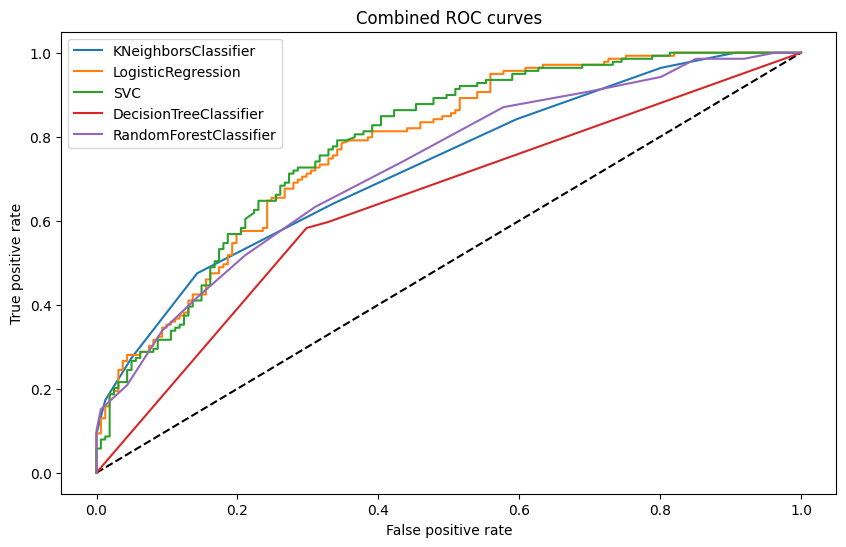

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize an empty list to store the fpr and tpr values for each model
combined_fpr = []
combined_tpr = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_probs = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    combined_fpr.append(fpr)
    combined_tpr.append(tpr)

    print('Area Under ROC curve for {} : {:.4f}'.format(name, roc_auc_score(y_test, y_pred_probs)))

# Plot the combined ROC curve
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], '--k')
for i in range(len(models)):
    plt.plot(combined_fpr[i], combined_tpr[i], label=list(models.keys())[i])
plt.title('Combined ROC curves')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()
